# Introduction to Machine Learning and Deep Learning

### Acknowledgements

The content of this notebook was originally created by Nils Eckstein, Julia Buhmann, and Jan Funke for the 2021 DL@MBL course in Woods Hole, and later chopped up and modified by Florian Jug for the 2021 course DL4MIA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2021-11-21 11:12:57.533422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-21 11:12:57.533458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Use Keras to Train a (Small) Neural Network

The previous task demonstrated that chosing the weights of a neural network by hand can be quite painful even for simple functions. This will certainly get out of hand once we have more complex networks with several layers and many neurons per layer. But more importantly, the reason why we want to use neural networks to approximate a function is that (in general) we do not know exactly what the function is. We only have data points that describe the function implicitly.

In this task, we will design, train, and evaluate a neural network that can classify points of two different classes on a 2D plane, i.e., the input to our network are the coordinates of points in a plane. Net initial network we want to build should have one hidden layer containing 12 nodes (perceptrons) that receive input from two nodes each, and are themselves connected to one single output node that should predict a binary class for the given input (x,y).

For training this network, we will create a training and a testing dataset. We will then create the network and use stochastic gradient descent to train all network parameters on the training dataset and evaluate its performance on the testing dataset.

#### Data

We create both training and testing dataset from the following function (in practice, we would not know this function but have only the data available):

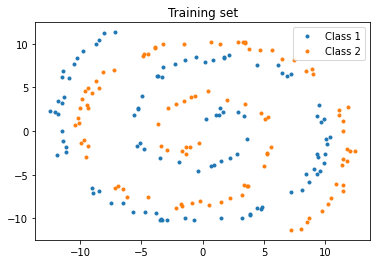

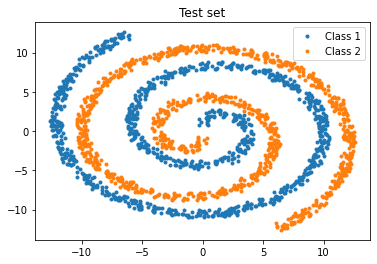

In [2]:
def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_train, y_train = generate_spiral_data(100)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

# Let's create and train the network on the generated data...

Please note how incredible short this code is... that's the power of modern neural network libraries...
Try to understand what is roughly going on in the cell below... feel free to use google to figure out what some parts might mean...

In [3]:
network = Sequential()
network.add(Dense(12, input_dim=2, activation='tanh'))
network.add(Dense(1, activation='sigmoid'))

network.compile(loss='mean_squared_error',
                  optimizer='SGD', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

# Train the model
network.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

# Predict on the testing data
prediction = np.round(network.predict(X_test).T[0])

2021-11-21 11:13:07.491565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-21 11:13:07.491649: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-21 11:13:07.491691: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (capableturing-34a32): /proc/driver/nvidia/version does not exist
2021-11-21 11:13:07.492217: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now that training is done, let's plot the results...

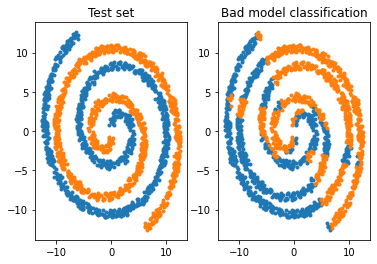

In [4]:
def plot_results(pred):
    plt.subplot(1,2,1)

    plt.title('Test set')
    plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
    plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
    plt.subplot(1,2,2)

    plt.title('Bad model classification')
    plt.plot(X_test[pred==0,0], X_test[pred==0,1], '.')
    plt.plot(X_test[pred==1,0], X_test[pred==1,1], '.')
    plt.show()

plot_results(prediction)

And the result is... **BAD!**

This is, because the network is likely not powerful enough... hence, the model we used is not adequate for the training task at hand.

## Exercise: find a better solution...

Create a second network that is somehow different and performs the task better...

**Note:** Likely it is a good idea to copy the cell from above and somehow change it in a meaningful way.

In [ ]:
############################
############################
############################

# create an alternative model (network) here and train it as we did before...
# currently network2 is the same as the network from above... just to give you a starting point...
network2 = Sequential()
network2.add(Dense(12, input_dim=2, activation='tanh'))
network2.add(Dense(1, activation='sigmoid'))

network2.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# Train the model
network2.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

# Predict on the testing data
prediction2 = np.round(network2.predict(X_test).T[0])

In [ ]:
plot_results(prediction2)

### Done? Cooool!

You should now make a short coding break and visit the website https://playground.tensorflow.org

Play a bit with it... figure out what elements are part of a typical network training workflow.